### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
!pip install matplotlib


In [3]:
import matplotlib

In [4]:
from matplotlib import pyplot as plt

Ingreso total tienda 1: 1150880400.0
Ingreso total tienda 2: 1116343500.0
Ingreso total tienda 3: 1098019600.0
Ingreso total tienda 4: 1038375700.0


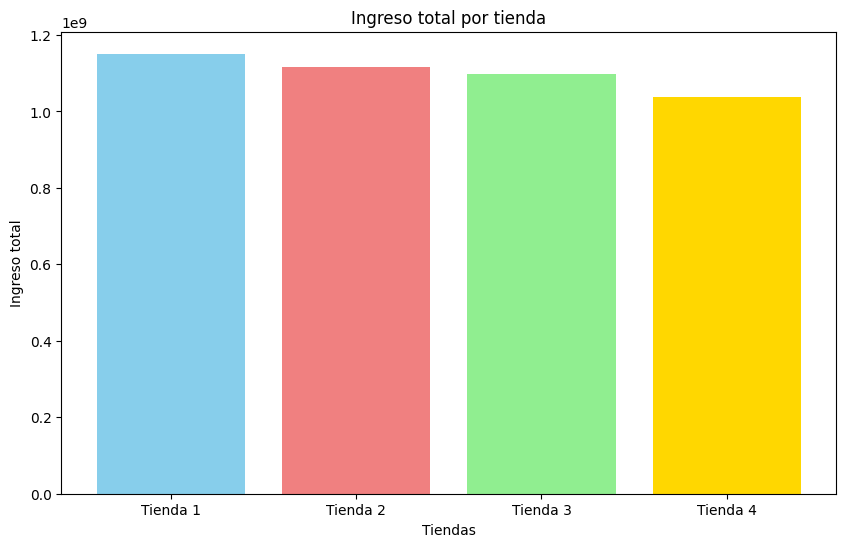

In [27]:
#Ingreso total por cada tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

print("Ingreso total tienda 1:", ingreso_tienda1)
print("Ingreso total tienda 2:", ingreso_tienda2)
print("Ingreso total tienda 3:", ingreso_tienda3)
print("Ingreso total tienda 4:", ingreso_tienda4)

# Gráfica de ingresos por tienda
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.bar(tiendas, ingresos, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Tiendas")
plt.ylabel("Ingreso total")
plt.title("Ingreso total por tienda")
plt.show()

# 2. Ventas por categoría

Ventas por categoría:
 Categoría del Producto
Artículos para el hogar    5.757980e+07
Deportes y diversión       1.429777e+08
Electrodomésticos          1.324751e+09
Electrónicos               1.660576e+09
Instrumentos musicales     3.487726e+08
Juguetes                   7.360440e+07
Libros                     3.769610e+07
Muebles                    7.576610e+08
Name: Precio, dtype: float64


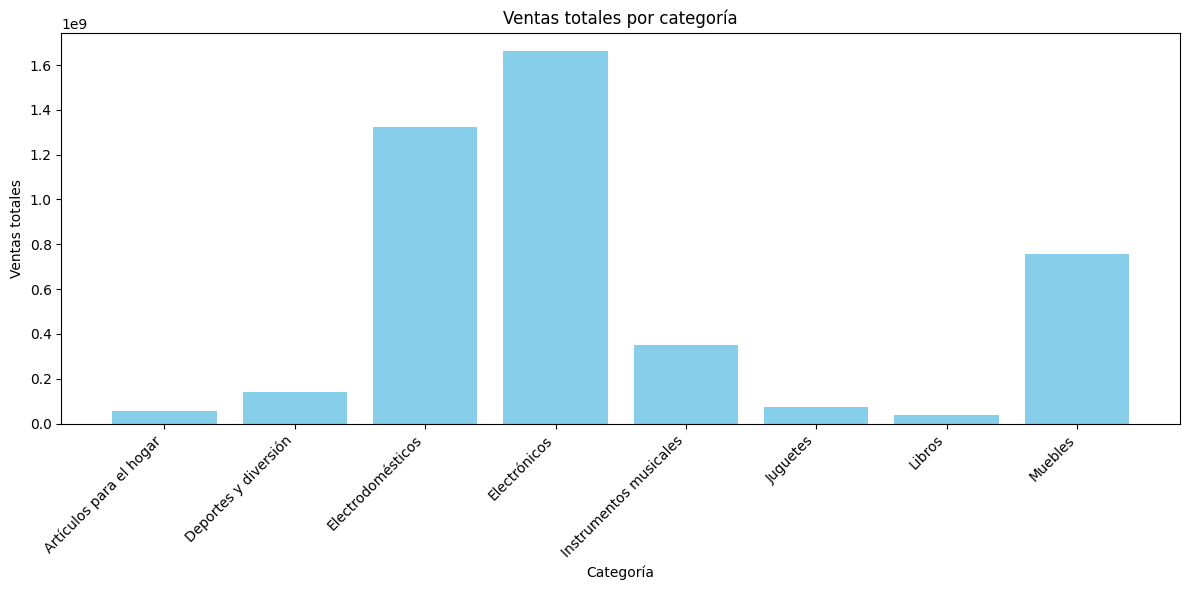

In [47]:
# Ventas por categoría
ventas_categoria1 = tienda.groupby("Categoría del Producto")["Precio"].sum()
ventas_categoria2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
ventas_categoria3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
ventas_categoria4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()

# Combinar las ventas de todas las tiendas
ventas_categorias_total = pd.concat([ventas_categoria1, ventas_categoria2, ventas_categoria3, ventas_categoria4])
ventas_categorias_total = ventas_categorias_total.groupby(level=0).sum()


print("Ventas por categoría:\n", ventas_categorias_total)

# Gráfica de ventas por categoría
plt.figure(figsize=(12, 6))
plt.bar(ventas_categorias_total.index, ventas_categorias_total.values, color='skyblue')
plt.xlabel("Categoría")
plt.ylabel("Ventas totales")
plt.title("Ventas totales por categoría")
plt.xticks(rotation=45, ha="right") # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()


# 3. Calificación promedio de la tienda


Calificación promedio tienda 1: 3.976685036032217
Calificación promedio tienda 2: 4.037303942348453
Calificación promedio tienda 3: 4.048325561678677
Calificación promedio tienda 4: 3.9957591178965224


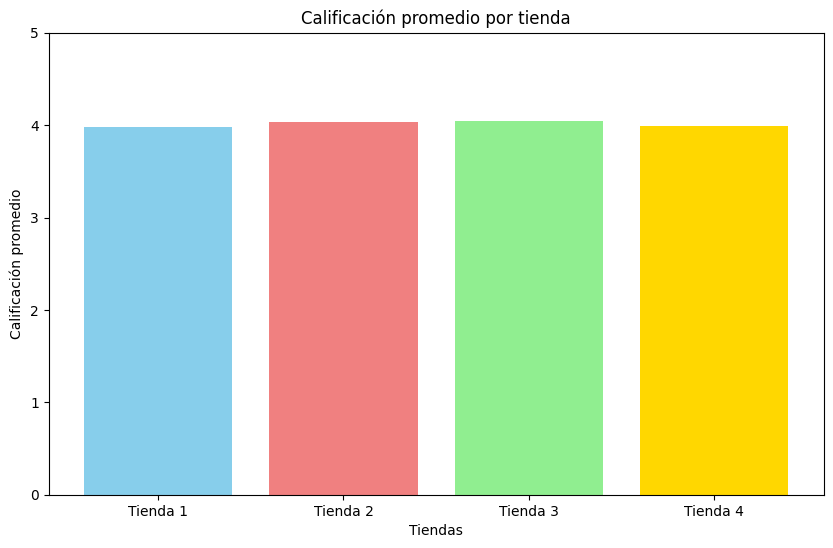

In [28]:
# Calcular la calificación promedio de cada tienda
avg_rating_tienda1 = tienda["Calificación"].mean()
avg_rating_tienda2 = tienda2["Calificación"].mean()
avg_rating_tienda3 = tienda3["Calificación"].mean()
avg_rating_tienda4 = tienda4["Calificación"].mean()

print("Calificación promedio tienda 1:", avg_rating_tienda1)
print("Calificación promedio tienda 2:", avg_rating_tienda2)
print("Calificación promedio tienda 3:", avg_rating_tienda3)
print("Calificación promedio tienda 4:", avg_rating_tienda4)

# Crear un gráfico de barras para las calificaciones promedio
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
calificaciones_promedio = [avg_rating_tienda1, avg_rating_tienda2, avg_rating_tienda3, avg_rating_tienda4]

plt.figure(figsize=(10, 6))
plt.bar(tiendas, calificaciones_promedio, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel("Tiendas")
plt.ylabel("Calificación promedio")
plt.title("Calificación promedio por tienda")
plt.ylim(0, 5)
plt.show()


# 4. Productos más y menos vendidos

Categoría que generó más dinero:
Categoría del Producto
Electrónicos    429493500.0
Name: Precio, dtype: float64

Categoría que generó menos dinero:
Categoría del Producto
Libros    8784900.0
Name: Precio, dtype: float64


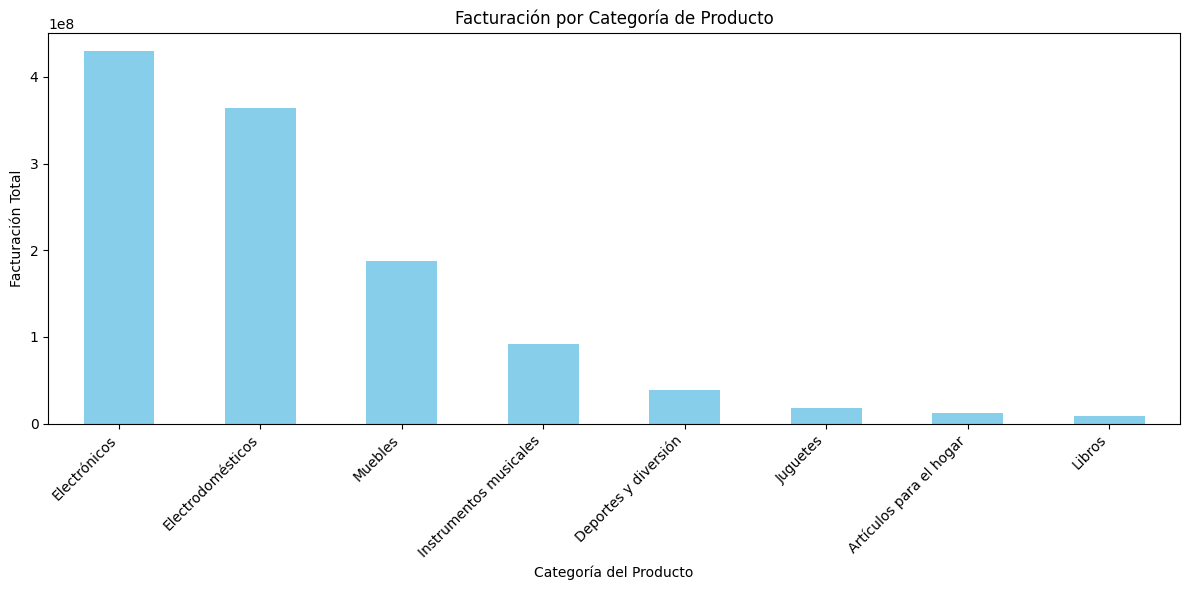

In [41]:
# Agrupar por categoría y sumar el precio total
facturacion_por_categoria = tienda.groupby("Categoría del Producto")["Precio"].sum()
# Ordenar de mayor a menor
facturacion_ordenada = facturacion_por_categoria.sort_values(ascending=False)
# Mostrar la categoría más y menos vendida (por facturación)
print("Categoría que generó más dinero:")
print(facturacion_ordenada.head(1))
print("\nCategoría que generó menos dinero:")
print(facturacion_ordenada.tail(1))

# Gráfica comparativa de facturación por categoría
plt.figure(figsize=(12, 6))
facturacion_ordenada.plot(kind='bar', color='skyblue')
plt.title('Facturación por Categoría de Producto')
plt.xlabel('Categoría del Producto')
plt.ylabel('Facturación Total')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [10]:
# Calcula el coste de envío medio para cada tienda
average_shipping_cost_tienda1 = tienda['Costo de envío'].mean()
average_shipping_cost_tienda2 = tienda2['Costo de envío'].mean()
average_shipping_cost_tienda3 = tienda3['Costo de envío'].mean()
average_shipping_cost_tienda4 = tienda4['Costo de envío'].mean()

print(f"\nAverage Shipping Cost - Tienda 1: {average_shipping_cost_tienda1}")
print(f"Average Shipping Cost - Tienda 2: {average_shipping_cost_tienda2}")
print(f"Average Shipping Cost - Tienda 3: {average_shipping_cost_tienda3}")
print(f"Average Shipping Cost - Tienda 4: {average_shipping_cost_tienda4}")



Average Shipping Cost - Tienda 1: 26018.60958033065
Average Shipping Cost - Tienda 2: 25216.235693090293
Average Shipping Cost - Tienda 3: 24805.680373039424
Average Shipping Cost - Tienda 4: 23459.457167090754


#6. Informe final

Basándonos en los análisis anteriores, se recomienda que el Sr. Juan venda su  **Tienda 4**.  Si bien la Tienda 4 tiene una menor calificación promedio por parte de los clientes, lo que sugiere una menor satisfacción y una posible desventaja competitiva.  Ya que los ingresos de la Tienda 4 son menores a la Tienda 1, una menor satisfacción del cliente puede traducirse a largo plazo en un menor crecimiento y rentabilidad. El punto bueno es que es la que menors costo de envio tiene pero la mala calificacion puede provocar que no se le saque provecho a esta ventaja, por esto mismo se recomiendo que se venta la tienda 4.

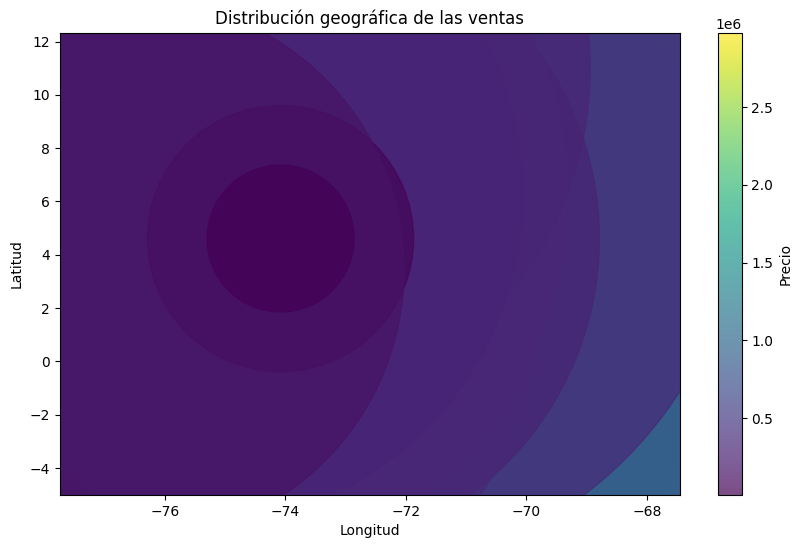

<ipython-input-48-eb48ff57f96b>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='lon', y='lat', data=all_stores, cmap="Reds", shade=True, thresh=0.05)


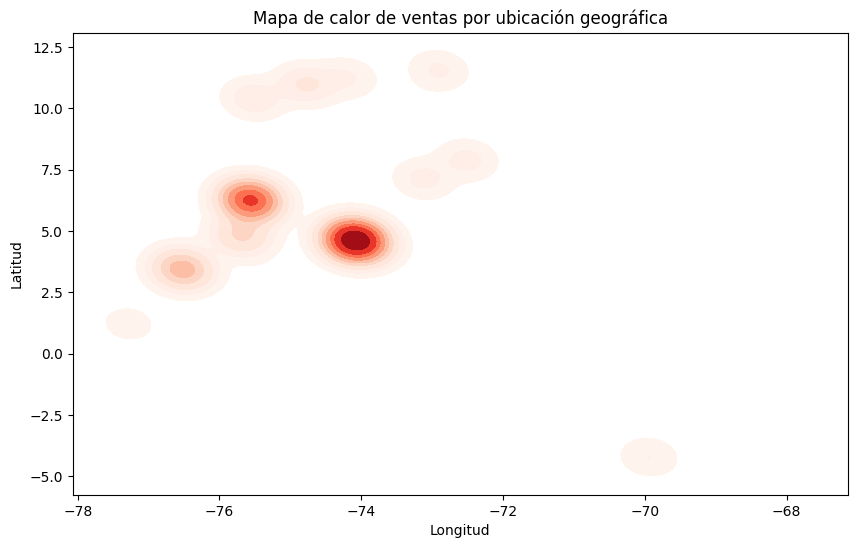

In [48]:
# Concatenar todos los DataFrames
all_stores = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(all_stores['lon'], all_stores['lat'], s=all_stores['Precio'], c=all_stores['Precio'], cmap='viridis', alpha=0.7)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica de las ventas')
plt.colorbar(label='Precio')
plt.show()

#Para un mapa de calor se necesita una librería adicional como seaborn o plotly
import seaborn as sns

#Crear un mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(x='lon', y='lat', data=all_stores, cmap="Reds", shade=True, thresh=0.05)
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title('Mapa de calor de ventas por ubicación geográfica')
plt.show()
